In [1]:
from pettingzoo.mpe import simple_spread_v3
import pandas as pd
import numpy as np

env = simple_spread_v3.env(render_mode="human")
env.reset()

In [5]:
from Wrapper.wrapper_analysis import raw_env
from tabulate import tabulate
import pandas as pd
import numpy as np

env = simple_spread_v3.parallel_env(render_mode="human")
env. reset()
observations = env.reset()
num_steps = 30
data = []

for _ in range(num_steps):
    actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    next_observations, rewards, terminations, truncations, infos = env.step(actions)

    for agent in env.agents:
        data.append({
            "agent": agent,
            "x_position": next_observations[agent][0],
            "y_position": next_observations[agent][1],
            "x_velocity": next_observations[agent][2],
            "y_velocity": next_observations[agent][3],
            "action": actions[agent],
            "reward": rewards[agent],
            "infos": infos[agent],

        })
    observations = next_observations
    if all(terminations.values()) or all(truncations.values()):
        break
env.close()

data = pd.DataFrame(data)
print(tabulate(data, headers='keys', tablefmt='psql'))




+----+---------+--------------+--------------+--------------+--------------+----------+-----------+---------+
|    | agent   |   x_position |   y_position |   x_velocity |   y_velocity |   action |    reward | infos   |
|----+---------+--------------+--------------+--------------+--------------+----------+-----------+---------|
|  0 | agent_0 |   -0         |   0.5        |    0.0441593 |  0.0209606   |        4 | -0.706924 | {}      |
|  1 | agent_1 |   -0.5       |   0          |    0.606197  |  0.872117    |        1 | -0.706924 | {}      |
|  2 | agent_2 |    0.5       |   0          |    0.498892  | -0.973434    |        2 | -0.706924 | {}      |
|  3 | agent_0 |   -0         |  -0.125      |    0.0441593 |  0.0709606   |        3 | -0.699312 | {}      |
|  4 | agent_1 |   -0.375     |  -0.5        |    0.556197  |  0.872117    |        3 | -0.699312 | {}      |
|  5 | agent_2 |    0.875     |   0          |    0.548892  | -0.973434    |        2 | -0.699312 | {}      |
|  6 | age

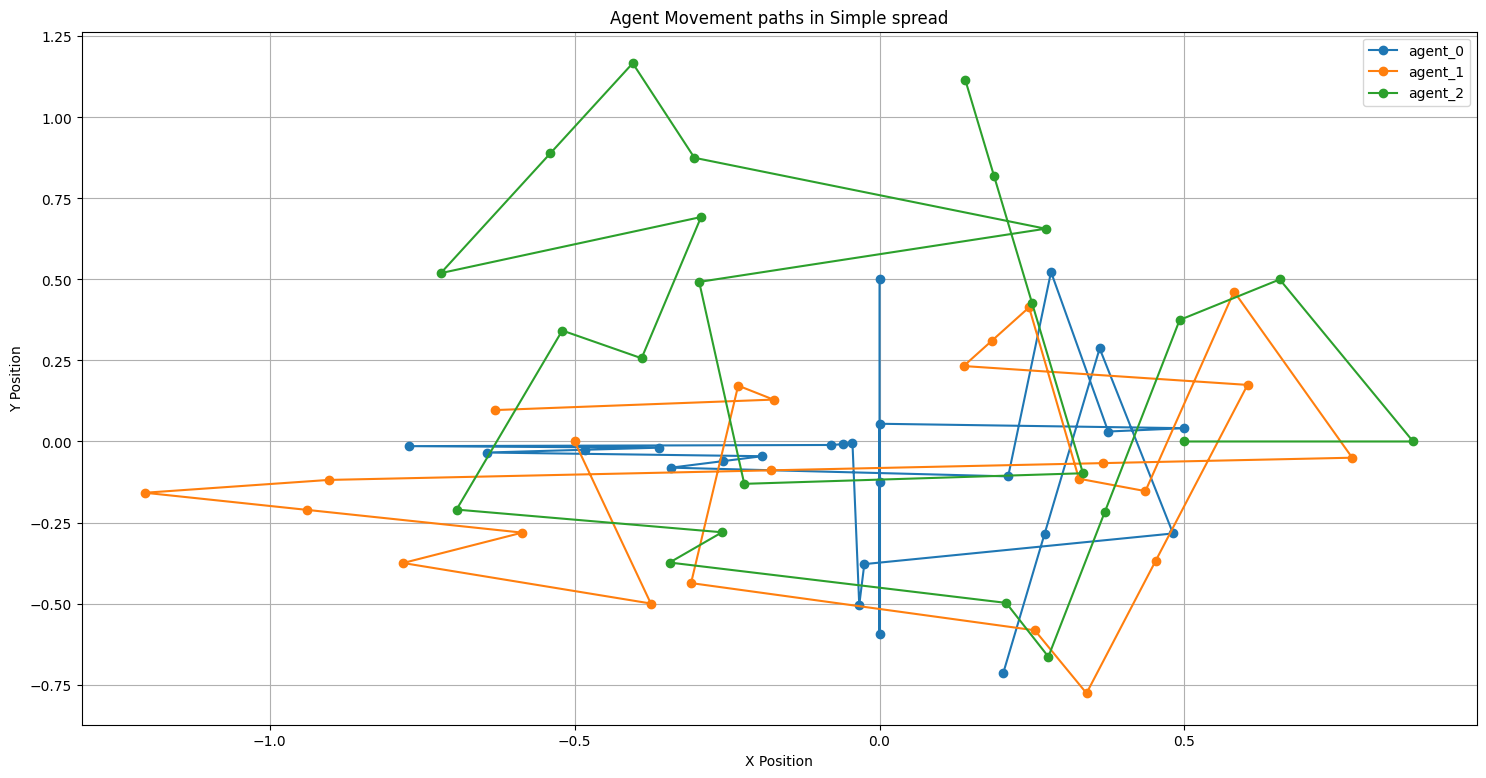

In [6]:
import matplotlib.pyplot as plt

agents = data["agent"].unique()

plt.figure(figsize=(18,9))
for agent in agents:
    agent_data = data[data["agent"] == agent]
    plt.plot(agent_data["x_position"], agent_data["y_position"],marker='o', linestyle='-', label=agent)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Agent Movement paths in Simple spread')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from pettingzoo.mpe import simple_spread_v3
env = simple_spread_v3.env(render_mode="human")
env.reset()
from tabulate import tabulate
import pandas as pd
import numpy as np

env = simple_spread_v3.parallel_env(render_mode="human")
env. reset()


agents = env.agents[:1]
observations = env.reset()
num_steps = 100
data2 = []

for _ in range(num_steps):
    actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    next_observations, rewards, terminations, truncations, infos = env.step(actions)

    for agent in env.agents:
        data2.append({
            "agent": agent,
            "x_position": next_observations[agent][0],
            "y_position": next_observations[agent][1],
            "x_velocity": next_observations[agent][2],
            "y_velocity": next_observations[agent][3],
            "action": actions[agent],
            "reward": rewards[agent],
            "infos": infos[agent],

        })
    observations = next_observations
    if all(terminations.values()) or all(truncations.values()):
        break
env.close()

data2 = pd.DataFrame(data2)
print(tabulate(data2, headers='keys', tablefmt='psql'))


+----+---------+--------------+--------------+--------------+--------------+----------+-----------+---------+
|    | agent   |   x_position |   y_position |   x_velocity |   y_velocity |   action |    reward | infos   |
|----+---------+--------------+--------------+--------------+--------------+----------+-----------+---------|
|  0 | agent_0 |   -0.0149293 |  -0.366172   |    0.954291  |   0.566724   |        3 | -1.17939  | {}      |
|  1 | agent_1 |    0.0149293 |  -0.633828   |    0.986059  |   0.281956   |        3 | -1.17939  | {}      |
|  2 | agent_2 |    0.5       |   0          |    0.137614  |   0.659843   |        2 | -0.679391 | {}      |
|  3 | agent_0 |   -0.0261263 |  -0.140801   |    0.952798  |   0.530107   |        0 | -0.729404 | {}      |
|  4 | agent_1 |    0.0261263 |  -1.1092     |    0.987552  |   0.218573   |        3 | -0.729404 | {}      |
|  5 | agent_2 |   -0.125     |   0          |    0.187614  |   0.659843   |        1 | -0.729404 | {}      |
|  6 | age

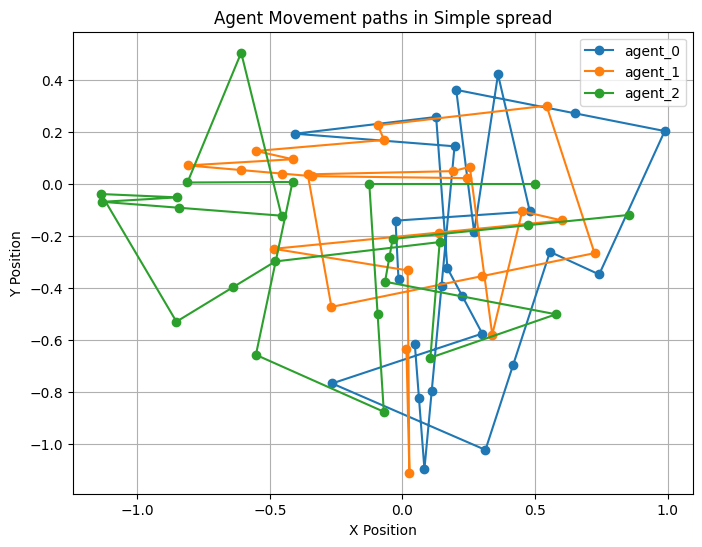

In [5]:
import matplotlib.pyplot as plt

agents = data2["agent"].unique()

plt.figure(figsize=(8,6))
for agent in agents:
    agent_data2 = data2[data2["agent"] == agent]
    plt.plot(agent_data2["x_position"], agent_data2["y_position"],marker='o', linestyle='-', label=agent)

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Agent Movement paths in Simple spread')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
"""
LimitedObservabilityWrapper - A Custom Wrapper for PettingZoo Environments

This wrapper modifies the observations received by agents in a multi-agent reinforcement learning (MARL) 
environment. It provides an option to selectively hide parts of an agent's observation, making the learning 
task more challenging or simulating partial observability.

Functionality:
---------------
1. **Hiding Agent Observations (`hide_agents=True`)**:
   - Removes information about other agents from an agent's observation.
   - This prevents agents from seeing each other, forcing them to navigate without direct knowledge of their peers.
   - Specifically, it zeros out the last 8 values in the observation, which correspond to the relative positions 
     and velocities of other agents.

2. **Hiding Landmark Observations (`hide_landmarks=True`)**:
   - Removes information about static landmarks from an agent's observation.
   - Agents will need to navigate the environment without knowing exactly where the landmarks are.
   - This zeros out indices 4 to 10 in the observation array, which contain landmark positions.

3. **Overriding the `reset()` Method**:
   - Calls the environment’s original `reset()` function.
   - Passes the observations through `modify_observations()` to apply the necessary modifications.
   - Returns the modified observations where hidden elements (agents/landmarks) are replaced with zeros.

4. **Overriding the `step()` Method**:
   - Calls the environment’s original `step()` function to execute agent actions.
   - Passes the new observations through `modify_observations()` before returning them.
   - Ensures that at each timestep, the agents only receive limited information based on the wrapper settings.

5. **`modify_observations()` Method**:
   - Iterates through each agent’s observation and modifies it based on the `hide_agents` and `hide_landmarks` settings.
   - Converts the observation to a NumPy array to allow direct manipulation.
   - Zeroes out relevant portions of the observation before returning the updated dictionary of observations.

By applying this wrapper, we can analyze how **limiting visibility** affects agent learning and behavior, 
which is useful for studying cooperation, robustness, and decentralized decision-making in multi-agent systems.
"""

from pettingzoo.utils import BaseWrapper
import numpy as np


class LimitedObservabilityWrapper(BaseWrapper): # Inherits from pettingzoo's wrapper
    def __init__(self, env, hide_agents=False, hide_landmarks=False):
        super().__init__(env) # Initialize Environment
        self.hide_agents = hide_agents # Boolean to control agents visibility
        self.hide_landmarks = hide_landmarks # Boolean to control landmark visibility

    # Overiding reset method
    def reset(self, seed=None, options=None):
        observations, _ = self.env.reset(seed=seed, options=options) # call original reset
        return self.modify_observations(observations)

    # Overiding Step method
    def step(self, actions):
        observations, rewards, terminations, truncations, infos = self.env.step(actions) #Execute step
        return self.modify_observations(observations), rewards, terminations, truncations, infos

    # Modifying Observations dynamically
    def modify_observations(self, observations):
        modified_obs = {} # Create dictionary for modified observations
        for agent, agent_obs in observations.items(): # Loop through each agent's observation
            obs_array = np.array(agent_obs) # Convert to numpy array

            if self.hide_agents:
                obs_array[-8:] = 0  # Zero out the last 8 values i.e other agent's position

            if self.hide_landmarks:
                obs_array[4:10] = 0 # Zero out 6 landmark positions

            modified_obs[agent] = obs_array # Store modified observation
        return modified_obs






In [48]:
from pettingzoo.mpe import simple_spread_v3  # Import the environment
from tabulate import tabulate
import pandas as pd
import numpy as np

env = simple_spread_v3.parallel_env()  # Initialize the parallel environment
wrapped_env = LimitedObservabilityWrapper(env, hide_agents=True, hide_landmarks=False)  # Apply wrapper

observations = wrapped_env.reset()  # Start the environment with modified observations

# Feature names
feature_names = [
    "SP_x", "SP_y", # Agents self position
    "SV_x", "SV_y", # Agents velocity
    "L1_x", "L1_y" # Landmark
]


max_steps = 25
all_steps = []

# Take a single step
for step in range(max_steps):
    obs_before = {agent: list(map(lambda value: round(float(value), 5), observations[agent][:6]))
              for agent in wrapped_env.agents} # Print only first 6 values


    actions = {agent: wrapped_env.action_space(agent).sample() for agent in wrapped_env.agents}
    new_obs, rewards, terminations, truncations, infos = wrapped_env.step(actions)

    new_obs = {agent: list(map(lambda value: round(float(value), 5), new_obs[agent][:6])) for agent in wrapped_env.agents}

# Store data for this step
    step_data = (
        [["Step " + str(step + 1), "Feature Names"] + feature_names] +  # Step label & Feature names
        [[agent, "Before"] + obs_before[agent] for agent in wrapped_env.agents] +  # Before observations
        [[agent, "After"] + new_obs[agent] for agent in wrapped_env.agents]  # After observations
    )

    all_steps.extend(step_data)  # Add to overall data

     # Stop if all agents are done
    if all(terminations.values()) or all(truncations.values()):
        print(f"✅ Simulation ended at Step {step+1} (Environment Terminated)")
        break  # Exit loop if simulation stops


# Convert to DataFrame
df_obs = pd.DataFrame(
    all_steps,
    columns=["Step", "Agent"] + feature_names  # Align columns properly
)



print(tabulate(df_obs, headers='keys', tablefmt='psql'))

df_obs.to_csv("df_obs.csv", index=False)


✅ Simulation ended at Step 25 (Environment Terminated)
+-----+---------+---------------+----------+----------+---------+----------+----------+----------+
|     | Step    | Agent         | SP_x     | SP_y     | SV_x    | SV_y     | L1_x     | L1_y     |
|-----+---------+---------------+----------+----------+---------+----------+----------+----------|
|   0 | Step 1  | Feature Names | SP_x     | SP_y     | SV_x    | SV_y     | L1_x     | L1_y     |
|   1 | agent_0 | Before        | 0.0      | 0.0      | 0.92888 | -0.03172 | -0.44858 | -0.50418 |
|   2 | agent_1 | Before        | 0.0      | 0.0      | 0.73584 | -0.99321 | -0.25554 | 0.45731  |
|   3 | agent_2 | Before        | 0.0      | 0.0      | 0.52307 | 0.74415  | -0.04277 | -1.28005 |
|   4 | agent_0 | After         | 0.0      | -0.0     | 0.92888 | -0.03172 | -0.44858 | -0.50418 |
|   5 | agent_1 | After         | -0.0     | -0.5     | 0.73584 | -0.99321 | -0.25554 | 0.45731  |
|   6 | agent_2 | After         | -0.0     | 0.5      

In [49]:
df_obs = pd.read_csv("df_obs.csv")
df_obs.head()

,Step,Agent,SP_x,SP_y,SV_x,SV_y,L1_x,L1_y
0,Step 1,Feature Names,SP_x,SP_y,SV_x,SV_y,L1_x,L1_y
1,agent_0,Before,0.0,0.0,0.92888,-0.03172,-0.44858,-0.50418
2,agent_1,Before,0.0,0.0,0.73584,-0.99321,-0.25554,0.45731
3,agent_2,Before,0.0,0.0,0.52307,0.74415,-0.04277,-1.28005
4,agent_0,After,0.0,-0.0,0.92888,-0.03172,-0.44858,-0.50418


C:\Users\koste\venv\Bachelor_Thesis\my_env\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


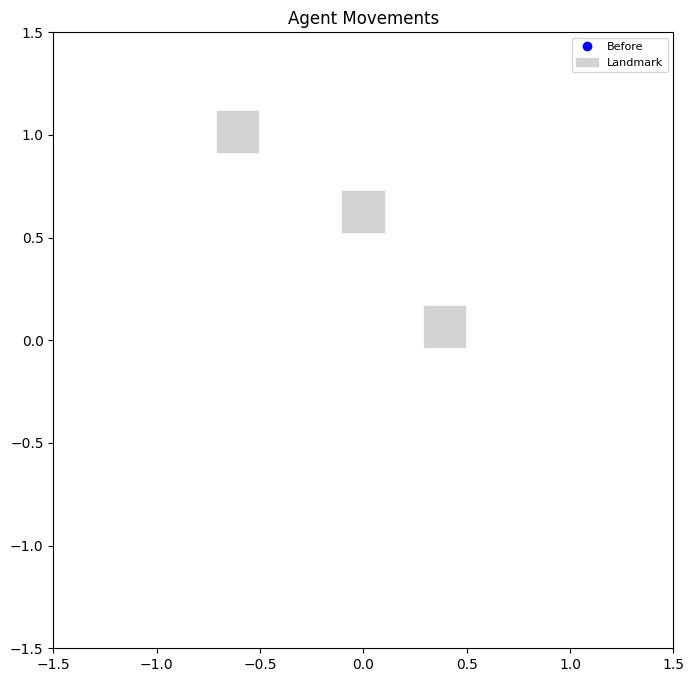

In [58]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
import matplotlib.animation as animation
import pandas as pd
import time

# Load Dataframe
df_obs = pd.read_csv("df_obs.csv")

# Extract unique agents 
agents = df_obs["Agent"].unique()[1::2]

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Agent Movements")

# Dictionary to hold agent markers
agent_legend = [plt.Line2D([0], [0], marker='o', color="w", markerfacecolor="blue", markersize=8, label=agent) for agent in agents]
landmark_legend = [patches.Patch(color="lightgray", label="Landmark")]
agent_markers = {agent: ax.plot([], [], 'o', markersize=8, label=agent)[0] for agent in agents}
collision_markers = [] # red marker for collision
stationary_counters = {} # tracking how long agents stayed in a place

# create static  landmark positions 
landmarks = {
    i: ax.add_patch(patches.Rectangle(
        (np.random.uniform(-1, 1), np.random.uniform(-1, 1)), 0.2, 0.2, color="lightgray"
    )) for i in range(3)  # three dynamic landmarks 
}

#Pause/play functionality
is_paused = False

def toggle_pause(event):
    "Toggles animation pause or play"
    global is_paused 
    if event.key ==  " ":
        is_paused = not is_paused

def update(frame): # Animation frame update
    global is_paused, agent_positions, landmarks
    if is_paused:
        return
    agent_positions = {}
    landmarks = {}
    
    step_info = df_obs[df_obs["Step"] == f"Step{frame+1}"]
    
    # clear previous collision markers 
    for marker in collision_markers:
        marker.remove()
    collision_markers.clear()
    
    for agent in agents:
        agent_data = step_info[step_info["Agent"] == agent]
        if not agent_data.empty:
            x,y = agent_data.iloc[0][["SP_x", "SP_y"]]
            agent_markers[agent].set_data(x,y)
            
            
            # Track stationary
            if agent in stationary_counters and stationary_counters[agent]["pos"]== (x, y):
                stationary_counters[agent]["pos"] += 0.5  # assume 0.5 sec per frame
            else:
                stationary_counters[agent] = {"pos": (x, y), "time":0}
            # Stationary time
            if stationary_counters[agent]> 1:
                ax.text(x,y, f"{stationary_counters[agent]['time']}s", fontsize=8, color="black")
            
            agent_positions[agent] = (float(x), float(y))
            
    position_counts = {}
    for pos in position_counts:
        position_counts[pos] = position_counts.get(pos, 0) + 1
           
    # check for collisions
    for pos, count in position_counts.items():
        if count > 1: # Collision
            x,y = pos
            marker = ax.plot(x, y, 'ro', markersize=10)[0]
            collisions_marker.append(marker)
            ax.text(x,y, f"{frame * 0.5:1}s", fontsize=8, color="black") # show collision
            
    # Update landmark
    for landmark in landmarks.values():
        new_x, new_y = np.random.uniform(-1,1), np.random.uniform(-1,1)
        landmark.set_xy((new_x, new_y))
            
    ax.figure.canvas.draw()
    return list(agent_markers.values()) + collision_markers

# Create animation
animations = [animation.FuncAnimation(fig, update, frames=len(df_obs["Step"].unique()), interval=500, blit=False,
                                      cache_frame_data=False)]

plt.legend(handles=agent_legend + landmark_legend, loc="upper right", fontsize=8)
plt.show()


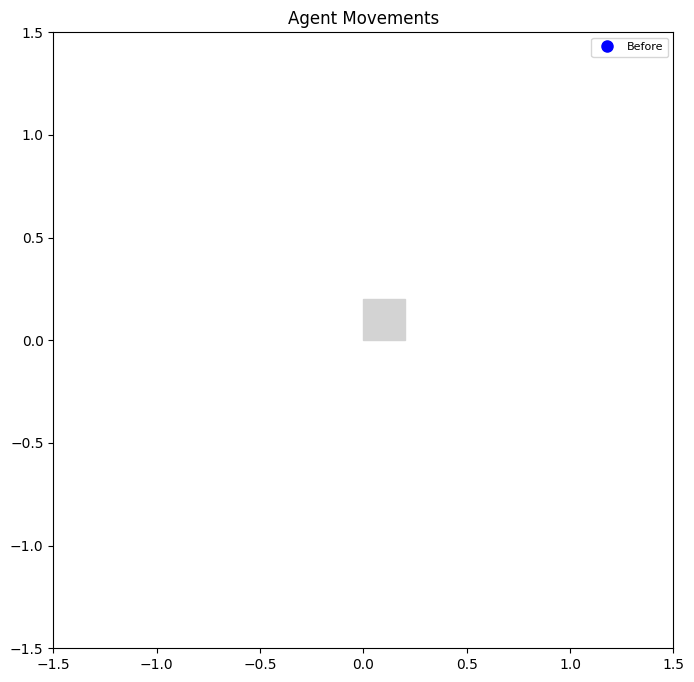

In [59]:
print(df_obs_load["Step"].unique())  # Debugging step


['Step 1' 'agent_0' 'agent_1' 'agent_2' 'Step 2' 'Step 3' 'Step 4'
 'Step 5' 'Step 6' 'Step 7' 'Step 8' 'Step 9' 'Step 10' 'Step 11'
 'Step 12' 'Step 13' 'Step 14' 'Step 15' 'Step 16' 'Step 17' 'Step 18'
 'Step 19' 'Step 20' 'Step 21' 'Step 22' 'Step 23' 'Step 24' 'Step 25']


In [63]:
# Drop the first row since it contains invalid header-like data
df_obs_load = df_obs_load.iloc[1:].reset_index(drop=True)

# Ensure 'Step' column is properly formatted (strip spaces and convert to string)
df_obs_load["Step"] = df_obs_load["Step"].astype(str).str.strip()
# Keep only rows where "Step" starts with "Step"
df_obs_load = df_obs_load[df_obs_load["Step"].str.startswith("Step")]

# Print unique step values after cleaning
print(df_obs_load["Step"].unique())  # Debugging step


['Step 3' 'Step 4' 'Step 5' 'Step 6' 'Step 7' 'Step 8' 'Step 9' 'Step 10'
 'Step 11' 'Step 12' 'Step 13' 'Step 14' 'Step 15' 'Step 16' 'Step 17'
 'Step 18' 'Step 19' 'Step 20' 'Step 21' 'Step 22' 'Step 23' 'Step 24'
 'Step 25']


In [64]:
print(df_obs_load["Step"].unique())  # Debugging


['Step 3' 'Step 4' 'Step 5' 'Step 6' 'Step 7' 'Step 8' 'Step 9' 'Step 10'
 'Step 11' 'Step 12' 'Step 13' 'Step 14' 'Step 15' 'Step 16' 'Step 17'
 'Step 18' 'Step 19' 'Step 20' 'Step 21' 'Step 22' 'Step 23' 'Step 24'
 'Step 25']


In [65]:
df = pd.read_csv("df_obs.csv")
df

,Step,Agent,SP_x,SP_y,SV_x,SV_y,L1_x,L1_y
0,Step 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Step 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Step 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Step 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Step 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Step 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Step 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Step 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Step 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Step 10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
from pettingzoo.mpe import simple_spread_v3  # Import the environment
from Wrapper.observabilty_wrapper1 import LimitedObservabilityWrapper
from tabulate import tabulate
import pandas as pd
import numpy as np

# Initialize the parallel environment
env = simple_spread_v3.parallel_env()
wrapped_env = LimitedObservabilityWrapper(env, hide_agents=True, hide_landmarks=False)  # Apply wrapper

# Start the environment with modified observations
observations = wrapped_env.reset()

# Feature names
feature_names = ["SP_x", "SP_y", "SV_x", "SV_y", "L1_x", "L1_y"]  # Self-position, velocity, landmark

max_steps = 25
all_rows = []  # Store each step's observations per agent

# ✅ FIX: Ensure Each Row is Uniquely Identified with Step and Agent State
for step in range(max_steps):
    obs_before = {agent: list(map(lambda value: round(float(value), 5), observations[agent][:6]))
                  for agent in wrapped_env.agents}  # Print only first 6 values

    actions = {agent: wrapped_env.action_space(agent).sample() for agent in wrapped_env.agents}
    new_obs, rewards, terminations, truncations, infos = wrapped_env.step(actions)

    new_obs = {agent: list(map(lambda value: round(float(value), 5), new_obs[agent][:6])) for agent in wrapped_env.agents}

    # ✅ Attach step, agent, and state ("Before" or "After")
    for agent in wrapped_env.agents:
        all_rows.append([step + 1, agent, "Before"] + obs_before[agent])
        all_rows.append([step + 1, agent, "After"] + new_obs[agent])

    # Stop if all agents are done
    if all(terminations.values()) or all(truncations.values()):
        print(f"✅ Simulation ended at Step {step + 1} (Environment Terminated)")
        break

# ✅ FIX: Convert to Structured DataFrame
df_obs = pd.DataFrame(
    all_rows,
    columns=["Step", "Agent", "State"] + feature_names  # Ensure all necessary columns
)

# ✅ FIX: Ensure Step Column is Formatted Correctly
df_obs["Step"] = df_obs["Step"].astype(int)  # Ensure step numbers are integers for correct filtering

# ✅ Debugging: Print and Save DataFrame
print(df_obs.head)  # Verify structure before saving
df_obs.to_csv("df_obs.csv", index=False)  # Save cleaned data

print("✅ DataFrame successfully saved with structured Step, Agent, and State data!")


✅ Simulation ended at Step 25 (Environment Terminated)
<bound method NDFrame.head of      Step    Agent   State     SP_x     SP_y     SV_x     SV_y     L1_x  \
0       1  agent_0  Before  0.00000  0.00000  0.79764 -0.56029 -1.59267   
1       1  agent_0   After -0.50000  0.00000  0.79764 -0.56029 -1.59267   
2       1  agent_1  Before  0.00000  0.00000 -0.70992 -0.22101 -0.08511   
3       1  agent_1   After  0.00000 -0.50000 -0.70992 -0.22101 -0.08511   
4       1  agent_2  Before  0.00000  0.00000  0.54051 -0.82598 -1.33553   
..    ...      ...     ...      ...      ...      ...      ...      ...   
139    24  agent_0   After -0.04111  0.42284  0.61408  0.47057 -1.40911   
140    24  agent_1  Before  0.00000  0.00000 -0.70992 -0.22101 -0.08511   
141    24  agent_1   After  1.15240 -0.03663  0.22912 -1.40636 -1.02415   
142    24  agent_2  Before  0.00000  0.00000  0.54051 -0.82598 -1.33553   
143    24  agent_2   After  0.93010  0.35657  0.76847 -1.96861 -1.56350   

        L1_y  

In [70]:
coll = pd.read_csv("collision_log.csv")
coll.head()

EmptyDataError: No columns to parse from file

In [81]:
df_raw_obs = pd.read_csv("raw_observations without wrapper.csv")
df_raw_obs.round(4)

,Step,Agent,State,SP_x,SP_y,SV_x,SV_y,L1_x,L1_y,L2_x,L2_y,L3_x,L3_y
0,1,agent_0,Before Wrapping,0.5000,-0.0000,0.2952,-0.4920,-0.8499,0.4148,-0.4445,1.0525,-1.1706,0.1112
1,1,agent_1,Before Wrapping,-0.0000,0.0000,-0.7248,-0.3100,0.1701,0.2328,0.5755,0.8705,-0.1506,-0.0708
2,1,agent_2,Before Wrapping,0.0000,-0.5000,0.8978,-0.4089,-1.4524,0.3318,-1.0470,0.9695,-1.7732,0.0281
3,2,agent_0,Before Wrapping,0.3750,0.5000,0.3452,-0.4920,-0.8999,0.4148,-0.4945,1.0525,-1.2206,0.1112
4,2,agent_1,Before Wrapping,0.5000,0.0000,-0.7248,-0.3100,0.1701,0.2328,0.5755,0.8705,-0.1506,-0.0708
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,23,agent_1,Before Wrapping,-0.1665,-0.1682,-0.6582,-0.6427,0.1035,0.5656,0.5089,1.2033,-0.2172,0.2619
68,23,agent_2,Before Wrapping,0.1984,0.0603,1.2674,0.4058,-1.8220,-0.4829,-1.4166,0.1548,-2.1428,-0.7866
69,24,agent_0,Before Wrapping,0.1375,-0.4947,0.3912,-0.7329,-0.9459,0.6558,-0.5405,1.2935,-1.2666,0.3521
70,24,agent_1,Before Wrapping,-0.1249,-0.1261,-0.6748,-0.6595,0.1202,0.5824,0.5256,1.2201,-0.2006,0.2787


In [83]:
df_wrapped = pd.read_csv("observations_after_wrapping.csv")
df_wrapped.round(4)

,Step,Agent,State,SP_x,SP_y,SV_x,SV_y,L1_x,L1_y,L2_x,L2_y,L3_x,L3_y
0,1,agent_0,After Wrapping,0.0000,-0.5000,0.0560,0.8602,-0.0578,0.0628,-0.1643,-1.7749,-0.4195,0.0788
1,1,agent_1,After Wrapping,-0.5000,0.0000,-0.9610,0.9272,0.9592,-0.0042,0.8527,-1.8419,0.5975,0.0118
2,1,agent_2,After Wrapping,-0.5000,-0.0000,-0.1950,0.1599,0.1932,0.7631,0.0867,-1.0746,-0.1685,0.7791
3,2,agent_0,After Wrapping,0.0000,-0.8750,0.0560,0.8102,-0.0578,0.1128,-0.1643,-1.7249,-0.4195,0.1288
4,2,agent_1,After Wrapping,-0.3750,0.0000,-1.0110,0.9272,1.0092,-0.0042,0.9027,-1.8419,0.6475,0.0118
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,23,agent_1,After Wrapping,0.4931,-0.4591,-1.1583,0.5108,1.1565,0.4121,1.0499,-1.4256,0.7948,0.4282
68,23,agent_2,After Wrapping,-0.1953,0.2715,-0.3169,-0.3487,0.3151,1.2717,0.2086,-0.5661,-0.0466,1.2877
69,24,agent_0,After Wrapping,-0.5056,-0.0114,-0.1417,0.6647,0.1399,0.2582,0.0334,-1.5795,-0.2218,0.2743
70,24,agent_1,After Wrapping,0.3698,-0.8443,-1.1090,0.4649,1.1071,0.4580,1.0006,-1.3797,0.7455,0.4741


In [80]:
from pettingzoo.mpe import simple_spread_v3

# Create the raw environment (before applying wrappers)
env = simple_spread_v3.raw_env()
env.reset()

# Access landmarks directly before wrapping
for i, landmark in enumerate(env.world.landmarks):
    print(f"Landmark {i}: Position {landmark.state.p_pos}, Velocity {landmark.state.p_vel}")


Landmark 0: Position [ 0.85668173 -0.58419398], Velocity [0. 0.]
Landmark 1: Position [-0.50589269  0.33140556], Velocity [0. 0.]
Landmark 2: Position [0.7076498  0.20835332], Velocity [0. 0.]


In [86]:
import pettingzoo.mpe.simple_spread_v3 as simple_spread
import matplotlib.pyplot as plt
import numpy as np

# Create environment
env = simple_spread.env(render_mode="human")
env.reset()

# Run a few steps in the environment
for _ in range(500):  # Run for 100 steps
    for agent in env.agent_iter():
        obs, reward, termination, truncation, info = env.last()
        if termination or truncation:
            action = None  # No action if agent is done
        else:
            action = env.action_space(agent).sample()  # Random action
        
        env.step(action)

env.close()


In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df_com = pd.read_csv("masked_observations.csv")
df_com


,Step,Agent,Position_X,Position_Y,Velocity_X,Velocity_Y,Rewards,Masked
0,0,agent_0,NaN,NaN,NaN,NaN,-2.076509,True
1,0,agent_1,NaN,NaN,NaN,NaN,-2.076509,True
2,0,agent_2,NaN,NaN,NaN,NaN,-1.576509,True
3,1,agent_0,NaN,NaN,NaN,NaN,-2.016127,True
4,1,agent_1,NaN,NaN,NaN,NaN,-1.516127,True
...,...,...,...,...,...,...,...,...
67,22,agent_1,NaN,NaN,NaN,NaN,-0.951657,True
68,22,agent_2,NaN,NaN,NaN,NaN,-0.951657,True
69,23,agent_0,NaN,NaN,NaN,NaN,-0.914010,True
70,23,agent_1,NaN,NaN,NaN,NaN,-0.914010,True


In [6]:
df_raw_com = pd.read_csv("raw_observations.csv")
df_raw_com

,Step,Agent,Position_X,Position_Y,Velocity_X,Velocity_Y,Rewards,Masked
0,0,agent_0,NaN,NaN,NaN,NaN,-1.556740,False
1,0,agent_1,NaN,NaN,NaN,NaN,-1.556740,False
2,0,agent_2,NaN,NaN,NaN,NaN,-1.556740,False
3,1,agent_0,NaN,NaN,NaN,NaN,-1.492528,False
4,1,agent_1,NaN,NaN,NaN,NaN,-1.492528,False
...,...,...,...,...,...,...,...,...
67,22,agent_1,NaN,NaN,NaN,NaN,-1.819466,False
68,22,agent_2,NaN,NaN,NaN,NaN,-1.819466,False
69,23,agent_0,NaN,NaN,NaN,NaN,-1.845516,False
70,23,agent_1,NaN,NaN,NaN,NaN,-1.845516,False


In [10]:
import pettingzoo.mpe.simple_spread_v3 as simple_spread

# Initialize the environment
env = simple_spread.parallel_env()
observations, _ = env.reset()  # ✅ Corrected reset

# Select an agent and print its first observation
for agent in env.possible_agents:
    print(f"🔍 Agent: {agent} | Observation: {observations[agent]}")
    break  # Print only one example observation


🔍 Agent: agent_0 | Observation: [ 0.          0.          0.7157652  -0.03345121 -0.4478928  -0.50469357
 -0.10706303  0.03053272  0.09019498 -0.56980574 -0.8653078   0.5349349
 -0.9542327   0.76441586  0.          0.          0.          0.        ]
